P2 Data Scientist, OpenClassrooms

Oumeima EL GHARBI, novembre 2021

Notebook 2 : exploration des données.

**Problématique** : 

*1) Quels sont les pays avec un fort potentiel de clients pour nos services ?*

Réponse : nous avons une liste de 7 pays intéressants qui sont par ordre d'intérêt :


- **1) Corée du Sud** 
- **2) Japon**
- **3) Etats-Unis** 
- 4) Royaume-Uni
- 5) et 6) Allemagne et Russie
- 7) **France**

*2) Dans quels pays l'entreprise doit-elle opérer en priorité ?*
Réponse : nous allons comparer ces 7 pays par indicateurs à l'aide d'une matrice de corrélations, de barplot (diagrammes en bâtons) et de boxplot (digramme à boîtes).

*3) Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?*

Réponse : Nous allons tracer deux graphiques de type lineplot ( points reliés) comparant les trois meilleurs pays sur toutes les années disponibles pour les indicateurs d'internet et du nombre d'étudiants dans l'enseignement supérieur.




Nous lisons tous nos jeux de données issus du notebook de nettoyage.

In [321]:
# Affichage avec la bibliothèque graphique intégrée à Notebook
%matplotlib inline

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('max_columns', None)
pd.set_option('max_colwidth', None)

In [322]:
df_population = pd.read_csv("csv/population_final.csv")
df_internet = pd.read_csv("csv/internet_final.csv")
df_isec = pd.read_csv("csv/nb_inscrits_secondaire_final.csv")
df_isup = pd.read_csv("csv/nb_inscrits_superieur_adjusted_final.csv")
df_pour = pd.read_csv("csv/poursuite_etudes_sup_adjusted_final.csv")
df_proj = pd.read_csv("csv/projection_jeunes_diplomes_secondaire_final.csv")

#df_isup = pd.read_csv("csv/nb_inscrits_superieur_final.csv")
#df_pour = pd.read_csv("csv/poursuite_etudes_sup_final.csv")

In [323]:
display(df_population)
display(df_internet)
display(df_isec)
display(df_isup)
display(df_pour)
display(df_proj)

,Country Name,Country Code,Indicator Name,2016
0,United States,USA,"Population, ages 15-64, total",213071223.0
1,Russian Federation,RUS,"Population, ages 15-64, total",99477057.0
2,Japan,JPN,"Population, ages 15-64, total",76831284.0
3,Germany,DEU,"Population, ages 15-64, total",54263836.0
4,United Kingdom,GBR,"Population, ages 15-64, total",42028042.0
5,France,FRA,"Population, ages 15-64, total",41796373.0
6,"Korea, Rep.",KOR,"Population, ages 15-64, total",37364822.0


,Country Name,Indicator Name,2016
0,United Kingdom,Internet users (per 100 people),94.775801
1,"Korea, Rep.",Internet users (per 100 people),92.716545
2,Japan,Internet users (per 100 people),92.000000
3,Germany,Internet users (per 100 people),89.647101
4,France,Internet users (per 100 people),85.622200
5,Russian Federation,Internet users (per 100 people),76.409085
6,United States,Internet users (per 100 people),76.176737


,Country Name,Indicator Name,2014
0,United States,"Enrolment in upper secondary education, both sexes (number)",11736315.00
1,United Kingdom,"Enrolment in upper secondary education, both sexes (number)",4195081.50
2,Japan,"Enrolment in upper secondary education, both sexes (number)",3682920.00
3,Russian Federation,"Enrolment in upper secondary education, both sexes (number)",2823004.00
4,France,"Enrolment in upper secondary education, both sexes (number)",2598357.00
5,Germany,"Enrolment in upper secondary education, both sexes (number)",2579952.25
6,"Korea, Rep.","Enrolment in upper secondary education, both sexes (number)",1903857.00


,Country Name,Indicator Name,2015
0,United States,"Enrolment in tertiary education, all programmes, both sexes (number)",19531728.00
1,Russian Federation,"Enrolment in tertiary education, all programmes, both sexes (number)",6592416.00
2,Japan,"Enrolment in tertiary education, all programmes, both sexes (number)",3862460.00
3,"Korea, Rep.","Enrolment in tertiary education, all programmes, both sexes (number)",3268099.00
4,Germany,"Enrolment in tertiary education, all programmes, both sexes (number)",2977781.00
5,France,"Enrolment in tertiary education, all programmes, both sexes (number)",2388880.00
6,United Kingdom,"Enrolment in tertiary education, all programmes, both sexes (number)",2352932.75


,Country Name,Indicator Name,2015
0,"Korea, Rep.","Gross enrolment ratio, tertiary, both sexes (%)",93.179138
1,United States,"Gross enrolment ratio, tertiary, both sexes (%)",85.795776
2,Russian Federation,"Gross enrolment ratio, tertiary, both sexes (%)",80.394081
3,Germany,"Gross enrolment ratio, tertiary, both sexes (%)",68.265587
4,France,"Gross enrolment ratio, tertiary, both sexes (%)",64.390472
5,Japan,"Gross enrolment ratio, tertiary, both sexes (%)",63.362591
6,United Kingdom,"Gross enrolment ratio, tertiary, both sexes (%)",56.476768


,Country Name,Indicator Name,2020,2025,2030
0,"Korea, Rep.",Wittgenstein Projection: Percentage of the population age 20-39 by highest level of educational attainment. Post Secondary. Total,0.61,0.66,0.68
1,Japan,Wittgenstein Projection: Percentage of the population age 20-39 by highest level of educational attainment. Post Secondary. Total,0.61,0.65,0.67
2,France,Wittgenstein Projection: Percentage of the population age 20-39 by highest level of educational attainment. Post Secondary. Total,0.43,0.46,0.49
3,United Kingdom,Wittgenstein Projection: Percentage of the population age 20-39 by highest level of educational attainment. Post Secondary. Total,0.38,0.41,0.43
4,Germany,Wittgenstein Projection: Percentage of the population age 20-39 by highest level of educational attainment. Post Secondary. Total,0.38,0.40,0.42
5,United States,Wittgenstein Projection: Percentage of the population age 20-39 by highest level of educational attainment. Post Secondary. Total,0.38,0.40,0.41
6,Russian Federation,Wittgenstein Projection: Percentage of the population age 20-39 by highest level of educational attainment. Post Secondary. Total,0.24,0.24,0.25


# Etape 1 : transposition des dataframes

In [324]:
# transposer : les lignes vont devenir des colonnes
data = {'Pays':[], 
        'Année': [], 'Population': [], 'Internet':[], 
        'Inscrits Enseignement Supérieur':[], 
        'Inscrits Enseignement Secondaire':[], 'Poursuite tertiaire': [], 
        'Projection : 20-39 ans tertiaire': []}

df_final = pd.DataFrame(data)
print("Ceci est le modèle du dataframe final que l'on veut obtenir :")
display(df_final)
# 7 pays x 6 ind + 7 x 2 = 42 + 14 = 56 lignes (car df_proj contient 3 infos par pays)

Ceci est le modèle du dataframe final que l'on veut obtenir :


,Pays,Année,Population,Internet,Inscrits Enseignement Supérieur,Inscrits Enseignement Secondaire,Poursuite tertiaire,Projection : 20-39 ans tertiaire


## 1) Population

In [325]:
display(df_population)

# 1)  nous tranposons le dataframe
df_population_t = df_population.T # or df.transpose()
display(df_population_t)

# 2) avec .loc nous récupérons la Series qui nous intéresse (Series = une ligne d'un dataframe)
pays_series = df_population_t.loc['Country Name']
ind_series = df_population_t.loc['2016']

# 3) données avec nom de la colonne et Series correspondantes
population_data = {'Pays': pays_series,
                'Année': pd.Series(['2016' for _ in range(7)]), 'Population': ind_series} 

# 4) création d'un nouveau dataframe
df_population_f = pd.DataFrame(population_data) 
display(df_population_f)

,Country Name,Country Code,Indicator Name,2016
0,United States,USA,"Population, ages 15-64, total",213071223.0
1,Russian Federation,RUS,"Population, ages 15-64, total",99477057.0
2,Japan,JPN,"Population, ages 15-64, total",76831284.0
3,Germany,DEU,"Population, ages 15-64, total",54263836.0
4,United Kingdom,GBR,"Population, ages 15-64, total",42028042.0
5,France,FRA,"Population, ages 15-64, total",41796373.0
6,"Korea, Rep.",KOR,"Population, ages 15-64, total",37364822.0


,0,1,2,3,4,5,6
Country Name,United States,Russian Federation,Japan,Germany,United Kingdom,France,"Korea, Rep."
Country Code,USA,RUS,JPN,DEU,GBR,FRA,KOR
Indicator Name,"Population, ages 15-64, total","Population, ages 15-64, total","Population, ages 15-64, total","Population, ages 15-64, total","Population, ages 15-64, total","Population, ages 15-64, total","Population, ages 15-64, total"
2016,213071223.0,99477057.0,76831284.0,54263836.0,42028042.0,41796373.0,37364822.0


,Pays,Année,Population
0,United States,2016,213071223.0
1,Russian Federation,2016,99477057.0
2,Japan,2016,76831284.0
3,Germany,2016,54263836.0
4,United Kingdom,2016,42028042.0
5,France,2016,41796373.0
6,"Korea, Rep.",2016,37364822.0


## 2) Internet

In [326]:
#display(df_internet)

df_internet_t = df_internet.T # or df.transpose()
#display(df_internet_t)

pays_series = df_internet_t.loc['Country Name']
ind_series = df_internet_t.loc['2016']
internet_data = {'Pays': pays_series,
                'Année': pd.Series(['2016' for _ in range(7)]), 'Internet': ind_series}

df_internet_f = pd.DataFrame(internet_data)
display(df_internet_f)


,Pays,Année,Internet
0,United Kingdom,2016,94.775801
1,"Korea, Rep.",2016,92.716545
2,Japan,2016,92.0
3,Germany,2016,89.647101
4,France,2016,85.6222
5,Russian Federation,2016,76.409085
6,United States,2016,76.176737


## 3) Inscrits Enseignement Supérieur

In [327]:
#display(df_isup)

df_isup_t = df_isup.T # or df.transpose()
#display(df_isup_t)

pays_series = df_isup_t.loc['Country Name']
ind_series = df_isup_t.loc['2015']
isup_data = {'Pays': pays_series,
                'Année': pd.Series(['2015' for _ in range(7)]), 'Inscrits Enseignement Supérieur': ind_series}

df_isup_f = pd.DataFrame(isup_data)
display(df_isup_f)

,Pays,Année,Inscrits Enseignement Supérieur
0,United States,2015,19531728.0
1,Russian Federation,2015,6592416.0
2,Japan,2015,3862460.0
3,"Korea, Rep.",2015,3268099.0
4,Germany,2015,2977781.0
5,France,2015,2388880.0
6,United Kingdom,2015,2352932.75


## 4) Inscrits Enseignement Secondaire


In [328]:
#display(df_isec)

df_isec_t = df_isec.T # or df.transpose()
#display(df_isec_t)

pays_series = df_isec_t.loc['Country Name']
ind_series = df_isec_t.loc['2014']
isec_data = {'Pays':pays_series,
                'Année': pd.Series(['2014' for _ in range(7)]), 'Inscrits Enseignement Secondaire': ind_series}

df_isec_f = pd.DataFrame(isec_data)
display(df_isec_f)

,Pays,Année,Inscrits Enseignement Secondaire
0,United States,2014,11736315.0
1,United Kingdom,2014,4195081.5
2,Japan,2014,3682920.0
3,Russian Federation,2014,2823004.0
4,France,2014,2598357.0
5,Germany,2014,2579952.25
6,"Korea, Rep.",2014,1903857.0


## 5) Poursuite tertiaire


In [329]:
#display(df_pour)

df_pour_t = df_pour.transpose()
#display(df_pour_t)

pays_series = df_pour_t.loc['Country Name']
ind_series = df_pour_t.loc['2015']
pour_data = {'Pays': pays_series,
                'Année': pd.Series(['2015' for _ in range(7)]), 'Poursuite tertiaire': ind_series}

df_pour_f = pd.DataFrame(pour_data)
display(df_pour_f)

,Pays,Année,Poursuite tertiaire
0,"Korea, Rep.",2015,93.179138
1,United States,2015,85.795776
2,Russian Federation,2015,80.394081
3,Germany,2015,68.265587
4,France,2015,64.390472
5,Japan,2015,63.362591
6,United Kingdom,2015,56.476768


## 6) Projection : 20-39 ans tertiaire

In [330]:
#display(df_proj)

df_proj_t = df_proj.T # or df.transpose()
#display(df_proj_t)

pays_series = df_proj_t.loc['Country Name']
pays_series = pd.Series(pays_series.tolist() * 3) # OU # pays_series = pd.Series(list(pays_series) * 3)

ind_series_2020 = df_proj_t.loc['2020']
ind_series_2025 = df_proj_t.loc['2025']
ind_series_2030 = df_proj_t.loc['2030']

# On ajoute les trois Series pour n'en avoir qu'une.
ind_series = ind_series_2020.append(ind_series_2025, ignore_index=True)
ind_series = ind_series.append(ind_series_2030, ignore_index=True)

proj_data = {'Pays': pays_series,
            'Année': pd.Series(['2020'] * 7 + ['2025'] * 7 + ['2030'] * 7), 
             'Projection : 20-39 ans tertiaire': ind_series}

df_proj_f1 = pd.DataFrame(proj_data)
display(df_proj_f1)

# on retire les 20 lignes du df projection pour avoir un DF FINAL de 10 lignes : pour la matrice de corrélation
df_proj_f2 = df_proj_f1.copy()
df_proj_f2 = df_proj_f2[df_proj_f2['Année'] == '2020']
display(df_proj_f2)

,Pays,Année,Projection : 20-39 ans tertiaire
0,"Korea, Rep.",2020,0.61
1,Japan,2020,0.61
2,France,2020,0.43
3,United Kingdom,2020,0.38
4,Germany,2020,0.38
5,United States,2020,0.38
6,Russian Federation,2020,0.24
7,"Korea, Rep.",2025,0.66
8,Japan,2025,0.65
9,France,2025,0.46


,Pays,Année,Projection : 20-39 ans tertiaire
0,"Korea, Rep.",2020,0.61
1,Japan,2020,0.61
2,France,2020,0.43
3,United Kingdom,2020,0.38
4,Germany,2020,0.38
5,United States,2020,0.38
6,Russian Federation,2020,0.24


# Etape 2 : fusion des 6 dataframes 

In [331]:
# on crée une liste de nos 6 dataframes transposés, contenant 7 pays.
dfList = [df_population_f, df_internet_f, df_isup_f, df_isec_f, df_pour_f, df_proj_f2]

In [332]:
# on retire les colonnes 'années'
dfList = [df.drop(columns='Année') for df in dfList]

# On joint les 6 df un à un, alignés par pays
df_final = dfList[0]
for i in range(1, len(dfList)):
    df_final = pd.merge(df_final, dfList[i], on='Pays') # 'on' : pour ne pas avoir des colonnes juxtaposées ou des NaN
    # on a fusionné les colonnes en fonction des pays

display(df_final)
df_final.to_csv("csv/df_final.csv", index=False)

,Pays,Population,Internet,Inscrits Enseignement Supérieur,Inscrits Enseignement Secondaire,Poursuite tertiaire,Projection : 20-39 ans tertiaire
0,United States,213071223.0,76.176737,19531728.0,11736315.0,85.795776,0.38
1,Russian Federation,99477057.0,76.409085,6592416.0,2823004.0,80.394081,0.24
2,Japan,76831284.0,92.0,3862460.0,3682920.0,63.362591,0.61
3,Germany,54263836.0,89.647101,2977781.0,2579952.25,68.265587,0.38
4,United Kingdom,42028042.0,94.775801,2352932.75,4195081.5,56.476768,0.38
5,France,41796373.0,85.6222,2388880.0,2598357.0,64.390472,0.43
6,"Korea, Rep.",37364822.0,92.716545,3268099.0,1903857.0,93.179138,0.61


,Population,Internet,Inscrits Enseignement Supérieur,Inscrits Enseignement Secondaire,Poursuite tertiaire,Projection : 20-39 ans tertiaire
0,213071223.0,76.176737,19531728.0,11736315.0,85.795776,0.38
1,99477057.0,76.409085,6592416.0,2823004.0,80.394081,0.24
2,76831284.0,92.0,3862460.0,3682920.0,63.362591,0.61
3,54263836.0,89.647101,2977781.0,2579952.25,68.265587,0.38
4,42028042.0,94.775801,2352932.75,4195081.5,56.476768,0.38
5,41796373.0,85.6222,2388880.0,2598357.0,64.390472,0.43
6,37364822.0,92.716545,3268099.0,1903857.0,93.179138,0.61


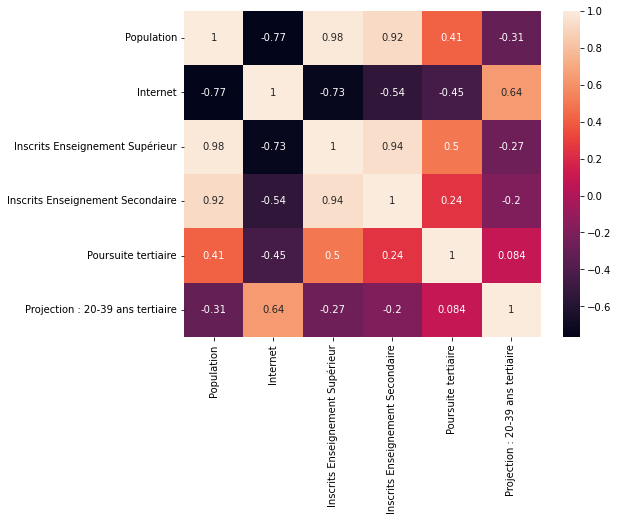

In [333]:
# on retire la colonne Pays afin de n'avoir que des nombres pour notre matrice de corrélation.
df_to_corr = df_final.drop(columns='Pays')
display(df_to_corr)

df_to_corr = df_to_corr.astype(float) # sinon ca ne fonctionne pas car il nous faut des nombres et non pas des objets
corr_df = df_to_corr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

La matrice de corrélation nous donne ces informations :

- corrélation positive de 0.98 entre le nombre d'étudiants dans le supérieur et la population : cohérent.

- corrélation positive de 0.92 entre le nombre d'étudiants dans le secondaire et la population : cohérent.

- corrélation positive de 0.94 entre le nombre d’inscrits dans le supérieur et dans le secondaire : cohérent.

- corrélation négative de -0.73  entre internet et le nombre d'inscrits dans le supérieur.
- corrélation négative de -0.77 entre internet et la population.


Conclusion : la matrice de corrélation n'est pas exploitable car certaines données avaient imputées.
En effet, nous comparons des données d'années différentes : population 2016 ou 2015, internet 2016 mais les inscrits dans l'enseignement supérieur 2014 ou 2013, les projections 2020.

Ainsi, nous ne concluerons pas à partir d'une matrice de corrélation.

# Etape 3 : Les graphes

# A) Variables univariées

## 1) Population

In [334]:
df_population.describe()

,2016
count,7.000000e+00
mean,8.069038e+07
std,6.255065e+07
min,3.736482e+07
25%,4.191221e+07
50%,5.426384e+07
75%,8.815417e+07
max,2.130712e+08


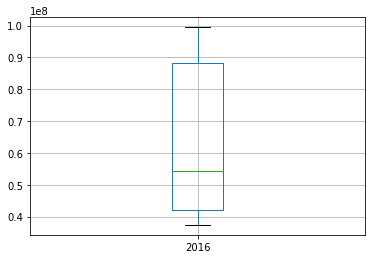

In [335]:
df_population.boxplot('2016', showfliers=False);

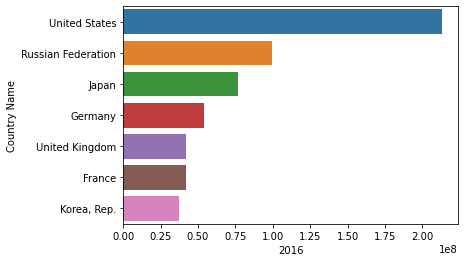

In [336]:
sns.barplot(x=df_population['2016'], y=df_population['Country Name']); # ; pour pas de texte ?

## 2) Internet

In [337]:
df_internet.describe()

,2016
count,7.000000
mean,86.763924
std,7.702465
min,76.176737
25%,81.015643
50%,89.647101
75%,92.358273
max,94.775801


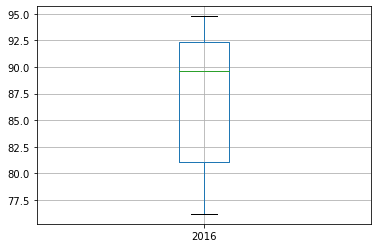

In [338]:
df_internet.boxplot('2016', showfliers=False);

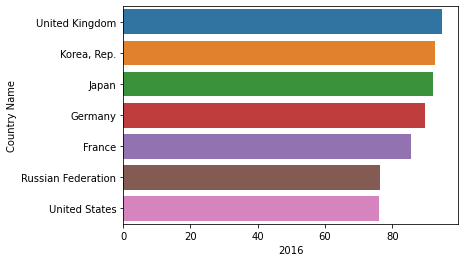

In [339]:
sns.barplot(x=df_internet['2016'], y=df_internet['Country Name']); # ; pour pas de texte ? 

## 3) Inscrits Enseignement Supérieur

In [340]:
df_isup.describe()

,2015
count,7.000000e+00
mean,5.853471e+06
std,6.202362e+06
min,2.352933e+06
25%,2.683330e+06
50%,3.268099e+06
75%,5.227438e+06
max,1.953173e+07


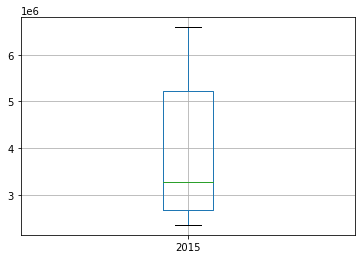

In [341]:
df_isup.boxplot('2015', showfliers=False);

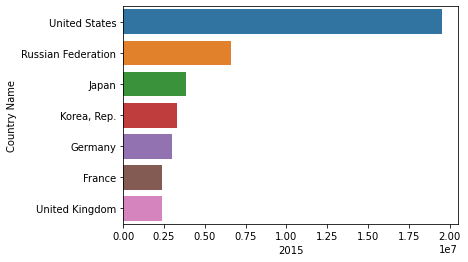

In [342]:
sns.barplot(x=df_isup['2015'], y=df_isup['Country Name']); # ; pour pas de texte ? 

## 4) Inscrits Enseignement Secondaire

In [343]:
df_isec.describe()

,2014
count,7.000000e+00
mean,4.217070e+06
std,3.401461e+06
min,1.903857e+06
25%,2.589155e+06
50%,2.823004e+06
75%,3.939001e+06
max,1.173632e+07


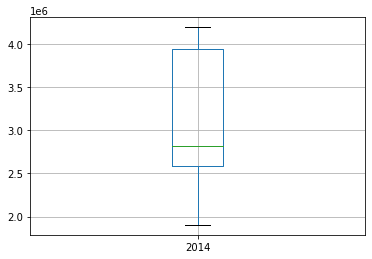

In [344]:
df_isec.boxplot('2014', showfliers=False);

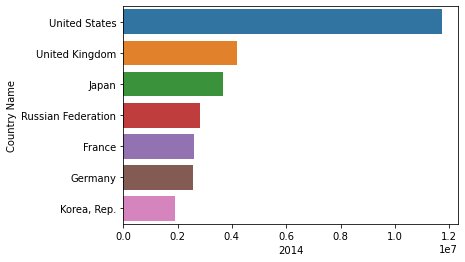

In [345]:
sns.barplot(x=df_isec['2014'], y=df_isec['Country Name']); # ; pour pas de texte ? 

## 5) Poursuite tertiaire

In [346]:
df_pour.describe()

,2015
count,7.000000
mean,73.123488
std,13.465578
min,56.476768
25%,63.876532
50%,68.265587
75%,83.094929
max,93.179138


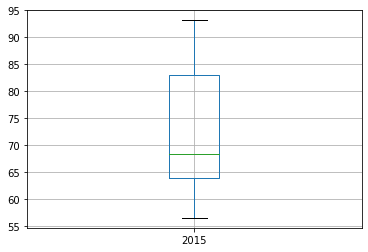

In [347]:
df_pour.boxplot('2015', showfliers=False);

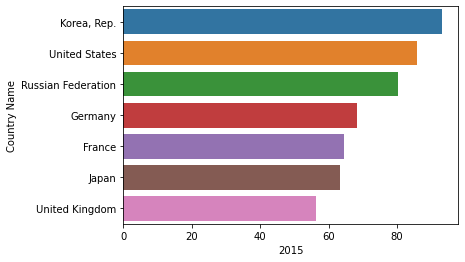

In [348]:
sns.barplot(x=df_pour['2015'], y=df_pour['Country Name']); # ; pour pas de texte ? 

## 6) Projection : 20-39 ans tertiaire

In [349]:
df_proj.describe()

,2020,2025,2030
count,7.000000,7.000000,7.000000
mean,0.432857,0.460000,0.478571
std,0.134377,0.149555,0.152799
min,0.240000,0.240000,0.250000
25%,0.380000,0.400000,0.415000
50%,0.380000,0.410000,0.430000
75%,0.520000,0.555000,0.580000
max,0.610000,0.660000,0.680000


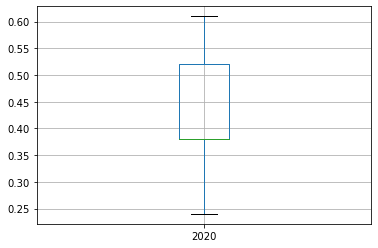

In [350]:
df_proj.boxplot('2020', showfliers=False);

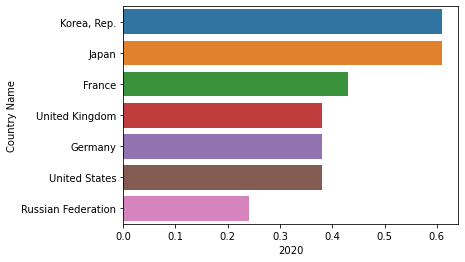

In [351]:
sns.barplot(x=df_proj['2020'], y=df_proj['Country Name']); # ; pour pas de texte ? 

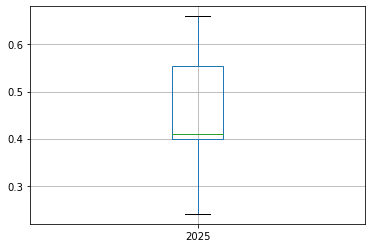

In [352]:
df_proj.boxplot('2025', showfliers=False);

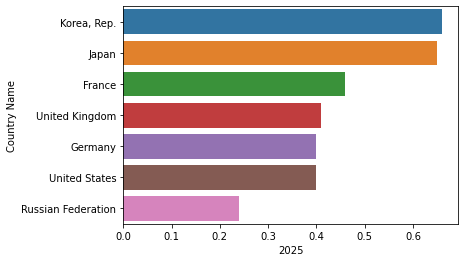

In [353]:
sns.barplot(x=df_proj['2025'], y=df_proj['Country Name']); # ; pour pas de texte ? 

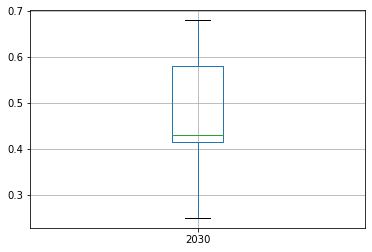

In [354]:
df_proj.boxplot('2030', showfliers=False);

# B) Variables bivariées / Historiques

## 1) Nettoyage dataframes

In [355]:
ind1 = "Internet users (per 100 people)"
ind2 = "Enrolment in tertiary education, all programmes, both sexes (number)"
list_ind = [ind1, ind2]
best_countries = ["Korea, Rep.", "United States", "Japan"]

x = pd.read_csv("csv/EdStatsData.csv") # on ne veut garder que 6 lignes 

# Nous sélectionnions dans le dataframe initialement non traité "df3" les 3 meilleurs pays de notre classement.
#df_historique = x.loc[((x["Country Name"] == best_countries[0]) | (x["Country Name"] == best_countries[1]) | (x["Country Name"] == best_countries[2])) & ((x["Indicator Name"] == ind1) | (x["Indicator Name"]== ind2))]
df_historique = x[(x["Country Name"].isin(best_countries)) & (x["Indicator Name"].isin(list_ind))]
df_historique = df_historique.drop(columns = ['Country Code', 'Indicator Code'])
display(df_historique)

,Country Name,Indicator Name,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
448334,Japan,"Enrolment in tertiary education, all programmes, both sexes (number)",NaN,1819323.0,1927322.0,1977176.0,2062161.0,2155893.0,2248903.0,2301444.0,2436862.0,2432052.0,2422915.0,2412117.0,2402725.0,2391915.0,2409983.0,2403371.0,2347463.0,2409687.0,2510169.0,2588470.0,2.683035e+06,2.781000e+06,2.899143e+06,NaN,3.841134e+06,3.917709e+06,NaN,NaN,3.963658e+06,3.940756e+06,3.982069e+06,3.972468e+06,3.966667e+06,3.984400e+06,4.031604e+06,4.038302e+06,4.084861e+06,4032625.0,3938632.0,3874224.0,3836314.00,3.880544e+06,3.884638e+06,3.862749e+06,3.862460e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
448505,Japan,Internet users (per 100 people),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.029368e-02,4.043804e-02,9.667803e-02,4.012775e-01,7.996843e-01,1.594363e+00,4.372982e+00,9.163077e+00,1.341404e+01,2.139129e+01,2.999074e+01,3.853206e+01,4.659420e+01,4.843527e+01,6.239393e+01,6.692107e+01,6.868527e+01,74.3,75.4,78.0,78.21,7.905411e+01,7.949640e+01,8.821943e+01,8.910683e+01,9.105803e+01,92.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
470324,"Korea, Rep.","Enrolment in tertiary education, all programmes, both sexes (number)",NaN,201436.0,214653.0,230330.0,250233.0,273479.0,318683.0,345679.0,385699.0,444009.0,538726.0,647505.0,829915.0,1028933.0,1204117.0,1345114.0,1455759.0,1514784.0,1548772.0,1573369.0,1.630374e+06,1.691429e+06,1.761775e+06,1.911765e+06,1.950306e+06,2.065579e+06,2.225092e+06,2.792410e+06,2.636388e+06,2.837880e+06,3.003498e+06,3.129899e+06,3.210142e+06,3.223431e+06,3.224875e+06,3.210184e+06,3.204036e+06,3208591.0,3204310.0,3219216.0,3269509.00,3.356011e+06,3.359739e+06,3.342264e+06,3.318307e+06,3.268099e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
470495,"Korea, Rep.",Internet users (per 100 people),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.326509e-02,4.612443e-02,9.840434e-02,2.499465e-01,3.113594e-01,8.196867e-01,1.624237e+00,3.600802e+00,6.781815e+00,2.355219e+01,4.470000e+01,5.660000e+01,5.940000e+01,6.550000e+01,7.270000e+01,7.350000e+01,7.810000e+01,78.8,81.0,81.6,83.70,8.375912e+01,8.407000e+01,8.477000e+01,8.755683e+01,8.964863e+01,92.716545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
847819,United States,"Enrolment in tertiary education, all programmes, both sexes (number)",NaN,8498117.0,8948645.0,9297787.0,9602123.0,10223729.0,11184859.0,11012137.0,11285787.0,11260092.0,11569899.0,12096895.0,12371672.0,12425780.0,12464661.0,12241940.0,12247055.0,12503511.0,12766000.0,13055000.0,1.353800e+07,1.371015e+07,1.436096e+07,1.448630e+07,1.430535e+07,1.427880e+07,1.426178e+07,NaN,1.328400e+07,1.376936e+07,1.320288e+07,1.359558e+07,1.592799e+07,1.661171e+07,1.690047e+07,1.727204e+07,1.748748e+07,17758870.0,18248124.0,19102814.0,20427708.00,2.101613e+07,2.099411e+07,1.997262e+07,1.970022e+07,1.953173e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
847990,United States,Internet users (per 100 people),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.847285e-01,1.163194e+00,1.724203e+00,2.271673e+00,4.862781e+00,9.237088e+00,1.641935e+01,2.161640e+01,3.009320e+01,3.584872e+01,4.307916e+01,4.908083e+01,5.878540e+01,6.169712e+01,6.475826e+01,6.796805e+01,6.893119e+01,75.0,74.0,71.0,71.69,6.972946e+01,7.470000e+01,7.140000e+01,7.300000e+01,7.455420e+01,76.176737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### A) Nettoyage indicateur d'internet

In [356]:
# Nous regardons l'indicateur d'internet en premier
df_historique_internet = df_historique.loc[df_historique['Indicator Name'] == ind1]
#display(df_historique_internet)

# Nous remettons à zéro l'indexation
df_historique_internet = df_historique_internet.copy().reset_index(drop=True)
#display(df_historique_internet)

# Nous retirons la colonne donnant le nom de l'indicateur
df_historique_internet.drop(columns='Indicator Name', inplace=True)
#  Nous retirons toutes les colonnes ayant des NaN car nous voulons comparer ces trois pays pour toutes les années disponibles
df_historique_internet = df_historique_internet.dropna(axis='columns') #1, or ‘columns’ : Drop columns which contain missing value.
display(df_historique_internet)


,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Japan,0.020294,0.040438,0.096678,0.401278,0.799684,1.594363,4.372982,9.163077,13.414041,21.391290,29.990740,38.532061,46.594201,48.435266,62.393930,66.921066,68.685270,74.3,75.4,78.0,78.21,79.054114,79.4964,88.219429,89.106833,91.058028,92.000000
1,"Korea, Rep.",0.023265,0.046124,0.098404,0.249947,0.311359,0.819687,1.624237,3.600802,6.781815,23.552194,44.700000,56.600000,59.400000,65.500000,72.700000,73.500000,78.100000,78.8,81.0,81.6,83.70,83.759120,84.0700,84.770000,87.556826,89.648631,92.716545
2,United States,0.784729,1.163194,1.724203,2.271673,4.862781,9.237088,16.419353,21.616401,30.093197,35.848724,43.079163,49.080832,58.785404,61.697117,64.758256,67.968053,68.931193,75.0,74.0,71.0,71.69,69.729461,74.7000,71.400000,73.000000,74.554202,76.176737


### B) Nettoyage indicateur d'éducation

In [357]:
# Nous réalisons le même nettoyage que précédemment
df_historique_isup = df_historique.loc[df_historique['Indicator Name'] == ind2]
#display(df_historique_isup)

df_historique_isup = df_historique_isup.copy().reset_index(drop=True)
df_historique_isup.drop(columns='Indicator Name', inplace=True)
df_historique_isup = df_historique_isup.dropna(axis='columns')
display(df_historique_isup)


,Country Name,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1994,1995,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Japan,1819323.0,1927322.0,1977176.0,2062161.0,2155893.0,2248903.0,2301444.0,2436862.0,2432052.0,2422915.0,2412117.0,2402725.0,2391915.0,2409983.0,2403371.0,2347463.0,2409687.0,2510169.0,2588470.0,2683035.0,2781000.0,2899143.0,3841134.0,3917709.0,3963658.0,3940756.0,3982069.0,3972468.0,3966667.0,3984400.0,4031604.0,4038302.0,4084861.0,4032625.0,3938632.0,3874224.0,3836314.0,3880544.0,3884638.0,3862749.0,3862460.0
1,"Korea, Rep.",201436.0,214653.0,230330.0,250233.0,273479.0,318683.0,345679.0,385699.0,444009.0,538726.0,647505.0,829915.0,1028933.0,1204117.0,1345114.0,1455759.0,1514784.0,1548772.0,1573369.0,1630374.0,1691429.0,1761775.0,1950306.0,2065579.0,2636388.0,2837880.0,3003498.0,3129899.0,3210142.0,3223431.0,3224875.0,3210184.0,3204036.0,3208591.0,3204310.0,3219216.0,3269509.0,3356011.0,3359739.0,3342264.0,3318307.0
2,United States,8498117.0,8948645.0,9297787.0,9602123.0,10223729.0,11184859.0,11012137.0,11285787.0,11260092.0,11569899.0,12096895.0,12371672.0,12425780.0,12464661.0,12241940.0,12247055.0,12503511.0,12766000.0,13055000.0,13538000.0,13710150.0,14360965.0,14305352.0,14278799.0,13284002.0,13769362.0,13202880.0,13595580.0,15927987.0,16611711.0,16900472.0,17272044.0,17487476.0,17758870.0,18248124.0,19102814.0,20427708.0,21016126.0,20994112.0,19972624.0,19700220.0


# 2) Historique Internet

Il nous faut transposer ces deux dataframes afin de pouvoir afficher un graphique (type évolution avec lineplot).
On a besoin d'une colonne "x" avec les années et une colonne "y" avec les valeurs de l'indicateur.
On tracera trois courbes, une par pays sur le même graphique.

On tranpose puis on crée un nouveau dataframe afin de pouvoir créer le tableau pivot (tableau à double entrée).

In [358]:
#display(df_historique_internet)

x = df_historique_internet.copy().T # or df.transpose()
#display(x)
#x.info() # on a 27 années

annees_series = []
pays_series = ["Japon", "Corée du Sud", "Etats-Unis"] * 27 # car 27 années donc 81 lignes
ind_series = []

for index, row in x.iterrows():
    if index == 'Country Name':
        continue
    else:
        for i in range(3):
            ind_series.append(row[i]) # on ajoute une fois pour chaque pays la valeur de l'indicateur internet
        for _ in range(3):
            annees_series.append(index) # on ajoute 3 fois l'année

#print(len(annees_series), len(pays_series), len(ind_series)) # Vérification que nous avons des Series de même dimension.

internet_hist_data = {'Année': annees_series ,
                      'Pays': pd.Series(pays_series),
                      'Internet': ind_series}

df_historique_internet_f = pd.DataFrame(internet_hist_data)
#display(df_historique_internet_f)
df_historique_internet_f.to_csv("csv/historique_internet.csv")

# On a donc transposé notre dataframe, puis on a crée un dataframe afin de créer le dataframe pivot / tableau à double entrée pour afficher notre graph

Voici notre dataframe avant sa transformation


,Année,Pays,Internet
0,1990,Japon,0.020294
1,1990,Corée du Sud,0.023265
2,1990,Etats-Unis,0.784729
3,1991,Japon,0.040438
4,1991,Corée du Sud,0.046124
...,...,...,...
76,2015,Corée du Sud,89.648631
77,2015,Etats-Unis,74.554202
78,2016,Japon,92.000000
79,2016,Corée du Sud,92.716545


Voici notre tableau à double entrée


Pays,Corée du Sud,Etats-Unis,Japon
Année,,,
1990,0.023265,0.784729,0.020294
1991,0.046124,1.163194,0.040438
1992,0.098404,1.724203,0.096678
1993,0.249947,2.271673,0.401278
1994,0.311359,4.862781,0.799684
1995,0.819687,9.237088,1.594363
1996,1.624237,16.419353,4.372982
1997,3.600802,21.616401,9.163077
1998,6.781815,30.093197,13.414041


<AxesSubplot:xlabel='Année'>

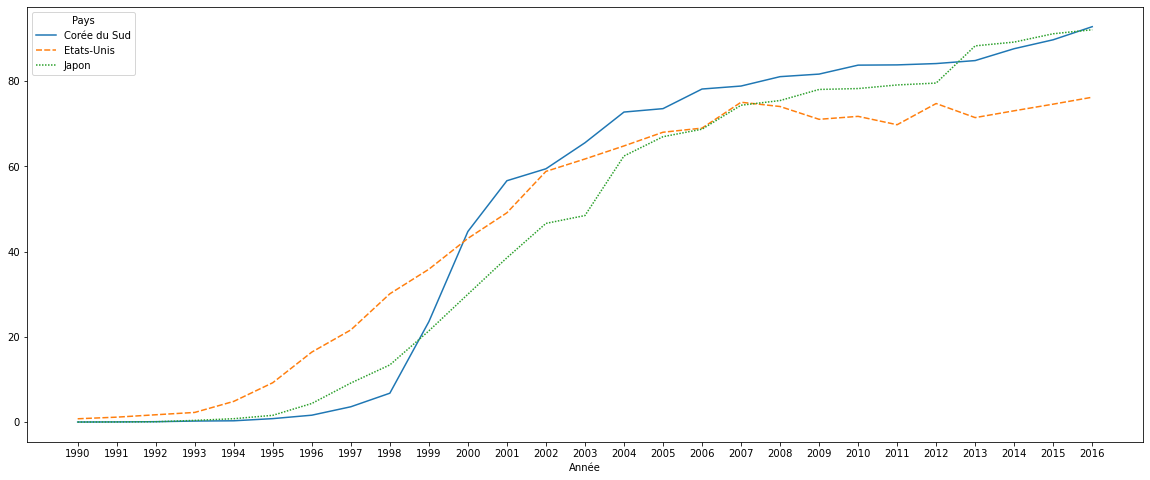

In [359]:
print("Voici notre dataframe avant sa transformation")
x = df_historique_internet_f.copy()
display(x)
#print(x.columns, end='\n')

print("Voici notre tableau à double entrée")
y = x.pivot("Année", "Pays", "Internet") #y = x.pivot(index="Année", columns="Pays", values="Internet")
display(y)
y.to_csv("csv/pivot_historique_internet.csv")

plt.figure(figsize=(20, 8))
sns.lineplot(data=y)
#plt.show() # si on ne le remet pas : un seul affichage
# sns.lineplot(data=df_h_internet_t, x="Années", y="Corée du Sud") # pour n'afficher qu'un pays à la fois

# Remarque : autre méthode pour obtenir le tableau pivot mais qui n'est pas optimale : changement d'index.

## 3) Historique nombre inscrits dans l'enseignement supérieur

In [360]:
# Nous réalisons à nouveau le même traitement
#display(df_historique_isup)

x = df_historique_isup.copy().T # or df.transpose()
#display(x)
#x.info() # on a 27 années

annees_series = []
pays_series = ["Japon", "Corée du Sud", "Etats-Unis"] * 41 # car 41 années donc 123 lignes
ind_series = []

for index, row in x.iterrows():
    if index == 'Country Name':
        continue
    else:
        for i in range(3):
            ind_series.append(row[i]) # on ajoute une fois pour chaque pays la valeur de l'indicateur internet
        for _ in range(3):
            annees_series.append(index) # on ajoute 3 fois l'année

#print(len(annees_series), len(pays_series), len(ind_series))

isup_hist_data = {'Année': annees_series ,
                      'Pays': pd.Series(pays_series),
                      'Nb inscrits supérieur': ind_series}

df_historique_isup_f = pd.DataFrame(isup_hist_data)
#display(df_historique_isup_f)
df_historique_isup_f.to_csv("csv/historique_isup.csv")

# On a donc transposé notre dataframe, puis on a crée un dataframe afin de créer le dataframe pivot / tableau à double entrée pour afficher notre graph

Voici notre dataframe avant sa transformation


,Année,Pays,Nb inscrits supérieur
0,1971,Japon,1819323.0
1,1971,Corée du Sud,201436.0
2,1971,Etats-Unis,8498117.0
3,1972,Japon,1927322.0
4,1972,Corée du Sud,214653.0
...,...,...,...
118,2013,Corée du Sud,3342264.0
119,2013,Etats-Unis,19972624.0
120,2014,Japon,3862460.0
121,2014,Corée du Sud,3318307.0


Voici notre tableau à double entrée


Pays,Corée du Sud,Etats-Unis,Japon
Année,,,
1971,201436.0,8498117.0,1819323.0
1972,214653.0,8948645.0,1927322.0
1973,230330.0,9297787.0,1977176.0
1974,250233.0,9602123.0,2062161.0
1975,273479.0,10223729.0,2155893.0
1976,318683.0,11184859.0,2248903.0
1977,345679.0,11012137.0,2301444.0
1978,385699.0,11285787.0,2436862.0
1979,444009.0,11260092.0,2432052.0


<AxesSubplot:xlabel='Année'>

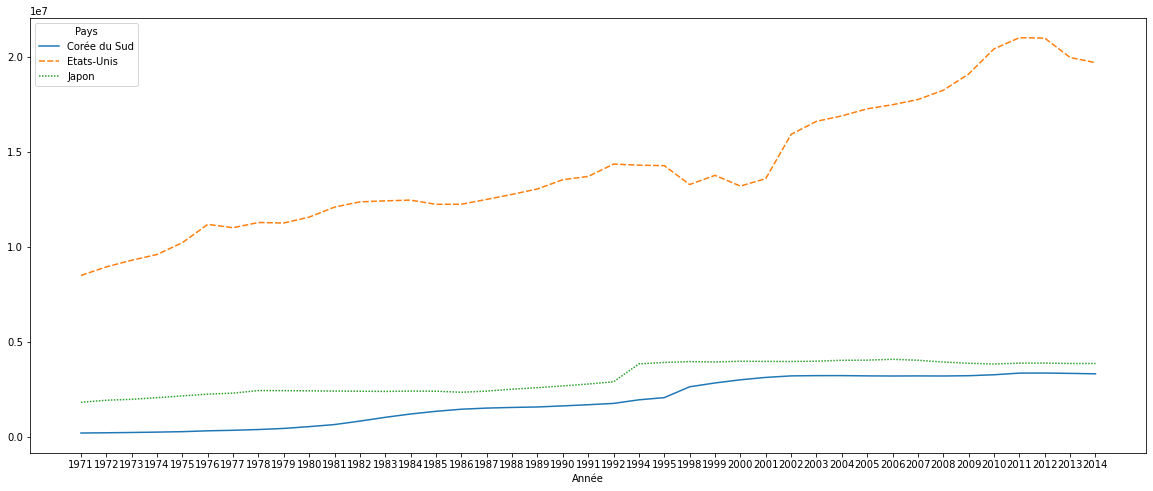

In [362]:
x = df_historique_isup_f.copy()
print("Voici notre dataframe avant sa transformation")
display(x)
#print(x.columns, end='\n')

print("Voici notre tableau à double entrée")
y = x.pivot("Année", "Pays", "Nb inscrits supérieur")
display(y)
y.to_csv("csv/pivot_historique_isup.csv")

plt.figure(figsize=(20, 8))
sns.lineplot(data=y)

## 4) Interprétation

**Internet**

Nous constatons une évolution similaire pour ces trois pays. Les sept pays choisis ont un bon taux d'utilisation d'internet.
Le Japon et la Corée du Sud ont un meilleur pourcentage d’utilisateurs, cependant les Etats-Unis ont une population bien plus élevée.

**Nombre d'étudiants dans le tertiare**

Sur les 20 dernières années, les Etats-Unis ont un nombre beaucoup plus élevé d’étudiants que la Corée du Sud et le Japon dont les courbes sont similaires et constantes.

# Conclusion

Nous avions retenu sept pays initialement qui présentent tous d'après l'étude menée un fort potentiel pour l'implémentation et le développement des services de l'entreprise.

L'étude à l'aide de la matrice de corrélation ne nous permet pas de conclure quand à la corrélation ou non des six indicateurs que nous avions choisis car ils sont biaisés (années différentes).

Nous avons retenus les trois pays ayant le meilleur score : Corée du Sud, Etats-Unis et Japon.
Sur ces trois pays, les Etats-Unis semblent être le pays présentant un potentiel de développement intéressant du fait de son nombre d'étudiants élevé.
Le Japon et la Corée du Sud présentent une population de lycéens élevée et ont un taux de poursuite d'études supérieures élevé aussi.

Cependant, les données sur lesquelles nous nous sommes basées datent au mieux de 2016, ainsi elles sont trop anciennes pour pouvoir prédire quels sont les pays où l'entreprise devraient se développer.

Dans l'attente de données de meilleures qualités, nous émettons l'hypothèse que l'entreprise pourrait commencer par les Etats-Unis, la Corée du Sud ou le Japon.